# 顧客の特性を一つ以上見つけること

In [8]:
import pandas as pd

df=pd.read_csv('bank-prep.csv',sep=',')
df.head()


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,divorced,married,single,primary,secondary,tertiary,cellular,telephone,unknown,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,58,0,2143,1,0,5,261,1,-1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,36,0,265,1,1,5,348,1,-1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,25,0,-7,1,0,5,365,1,-1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,53,0,-3,0,0,5,1666,1,-1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,24,0,-103,1,1,5,145,1,-1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [9]:
print(df.shape)

(6933, 32)


In [10]:
print(df.dtypes)

age          int64
default      int64
balance      int64
housing      int64
loan         int64
day          int64
duration     int64
campaign     int64
pdays        int64
previous     int64
y            int64
divorced     int64
married      int64
single       int64
primary      int64
secondary    int64
tertiary     int64
cellular     int64
telephone    int64
unknown      int64
apr          int64
aug          int64
dec          int64
feb          int64
jan          int64
jul          int64
jun          int64
mar          int64
may          int64
nov          int64
oct          int64
sep          int64
dtype: object


In [11]:
print(df.isnull().sum())

age          0
default      0
balance      0
housing      0
loan         0
day          0
duration     0
campaign     0
pdays        0
previous     0
y            0
divorced     0
married      0
single       0
primary      0
secondary    0
tertiary     0
cellular     0
telephone    0
unknown      0
apr          0
aug          0
dec          0
feb          0
jan          0
jul          0
jun          0
mar          0
may          0
nov          0
oct          0
sep          0
dtype: int64


In [12]:
from sklearn.preprocessing import MinMaxScaler

#MinMax変換

y=df['y']
df=df.drop('y',axis=1)

mc=MinMaxScaler()
mc.fit(df)

df_mc=pd.DataFrame(mc.transform(df),columns=df.columns)
df_mc.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,divorced,married,single,primary,secondary,tertiary,cellular,telephone,unknown,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0.549296,0.0,0.064555,1.0,0.0,0.133333,0.077540,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.239437,0.0,0.042335,1.0,1.0,0.133333,0.103387,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.084507,0.0,0.039116,1.0,0.0,0.133333,0.108437,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.478873,0.0,0.039164,0.0,0.0,0.133333,0.494949,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.070423,0.0,0.037981,1.0,1.0,0.133333,0.043078,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [14]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
sc.fit(df)

df_sc=pd.DataFrame(sc.transform(df),columns=df.columns)
df_sc.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,divorced,married,single,primary,secondary,tertiary,cellular,telephone,unknown,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,1.647908,-0.137148,0.250618,0.876711,-0.444540,-1.275382,-0.006613,-0.574193,-0.418664,-0.310149,-0.362951,0.818657,-0.631147,-0.417717,-1.080389,1.482027,-1.381354,-0.266889,1.614095,-0.256826,-0.3914,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073
1,-0.443424,-0.137148,-0.362335,0.876711,2.249514,-1.275382,0.317659,-0.574193,-0.418664,-0.310149,-0.362951,-1.221512,1.584418,-0.417717,0.925593,-0.674752,-1.381354,-0.266889,1.614095,-0.256826,-0.3914,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073
2,-1.489090,-0.137148,-0.451112,0.876711,-0.444540,-1.275382,0.381022,-0.574193,-0.418664,-0.310149,-0.362951,0.818657,-0.631147,-0.417717,0.925593,-0.674752,-1.381354,-0.266889,1.614095,-0.256826,-0.3914,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073
3,1.172605,-0.137148,-0.449807,-1.140627,-0.444540,-1.275382,5.230180,-0.574193,-0.418664,-0.310149,-0.362951,0.818657,-0.631147,-0.417717,0.925593,-0.674752,-1.381354,-0.266889,1.614095,-0.256826,-0.3914,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073
4,-1.584150,-0.137148,-0.482445,0.876711,2.249514,-1.275382,-0.438974,-0.574193,-0.418664,-0.310149,-0.362951,-1.221512,1.584418,-0.417717,0.925593,-0.674752,-1.381354,-0.266889,1.614095,-0.256826,-0.3914,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073


In [16]:
print("標準化の平均：",df_sc.mean())
print("標準化の分散：",df_sc.std())

標準化の平均： age         -3.085501e-16
default     -2.955983e-15
balance      8.058845e-17
housing      1.263524e-14
loan        -6.665694e-15
day         -1.745907e-15
duration     5.929837e-17
campaign     4.521945e-15
pdays        2.224701e-14
previous     1.160586e-15
divorced     1.641971e-15
married     -1.653693e-15
single      -1.133763e-15
primary     -2.040037e-15
secondary    2.141291e-15
tertiary     1.623955e-15
cellular     7.350275e-15
telephone    9.604558e-15
unknown     -3.957336e-14
apr         -3.182223e-16
aug         -7.228092e-15
dec          1.448650e-15
feb         -1.088728e-14
jan         -9.445567e-15
jul          1.463856e-14
jun         -6.843317e-15
mar         -2.591381e-15
may          9.057037e-15
nov          6.118989e-15
oct         -1.769291e-14
sep         -6.114746e-15
dtype: float64
標準化の分散： age          1.000072
default      1.000072
balance      1.000072
housing      1.000072
loan         1.000072
day          1.000072
duration     1.000072
campaign 

# 顧客のグループ化

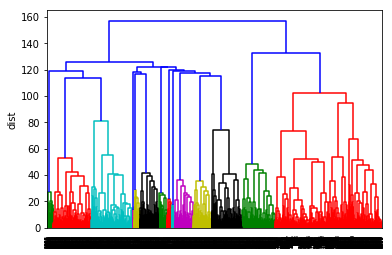

In [20]:
#階層型クラスタリング
#距離の近いデータから結合していく

# 各グループの重心と分散を計算
# 併合したときのグループの重心と分散を計算
# これらの差が最小になるグループ動詞を結合

from scipy.cluster.hierarchy import linkage,dendrogram
import matplotlib.pyplot as plt

hcls=linkage(df_sc,metric='euclidean',method='ward')#階層クラスタリング
dendrogram(hcls)

plt.ylabel('dist')
plt.show()

In [21]:
from scipy.cluster.hierarchy import fcluster#クラスIDを得るためにクラスを読み込む

cst_group=fcluster(hcls,100,criterion='distance')#データ間距離をユークリッド距離で測り、距離の閾値100とする
print(cst_group)#各顧客のクラスタIDが配列形式で表示


[14 14 14 ... 12 12 12]


In [22]:
print(df_sc.shape)
print(len(cst_group))

(6933, 31)
6933


In [23]:
#非階層型クラスタリング
#性質の似たk個のまとまりへ分割してグループを作る

#k-means
from sklearn.cluster import KMeans
kcls=KMeans(n_clusters=10)
cst_group=kcls.fit_predict(df_sc)

print(cst_group)
print(len(cst_group))

[2 2 2 ... 3 3 3]
6933


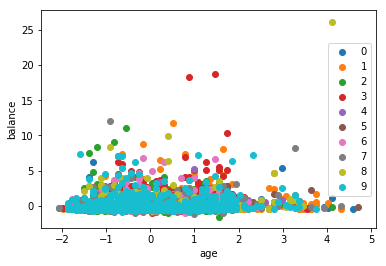

In [25]:
#分布をみる
for i in range(10):
  labels=df_sc[cst_group==i]
  plt.scatter(labels['age'],labels['balance'],label=i)

plt.legend()
plt.xlabel('age')
plt.ylabel('balance')
plt.show()

In [26]:
df_sc['group']=cst_group
df_sc.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,divorced,married,single,primary,secondary,tertiary,cellular,telephone,unknown,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,group
0,1.647908,-0.137148,0.250618,0.876711,-0.444540,-1.275382,-0.006613,-0.574193,-0.418664,-0.310149,-0.362951,0.818657,-0.631147,-0.417717,-1.080389,1.482027,-1.381354,-0.266889,1.614095,-0.256826,-0.3914,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073,2
1,-0.443424,-0.137148,-0.362335,0.876711,2.249514,-1.275382,0.317659,-0.574193,-0.418664,-0.310149,-0.362951,-1.221512,1.584418,-0.417717,0.925593,-0.674752,-1.381354,-0.266889,1.614095,-0.256826,-0.3914,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073,2
2,-1.489090,-0.137148,-0.451112,0.876711,-0.444540,-1.275382,0.381022,-0.574193,-0.418664,-0.310149,-0.362951,0.818657,-0.631147,-0.417717,0.925593,-0.674752,-1.381354,-0.266889,1.614095,-0.256826,-0.3914,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073,2
3,1.172605,-0.137148,-0.449807,-1.140627,-0.444540,-1.275382,5.230180,-0.574193,-0.418664,-0.310149,-0.362951,0.818657,-0.631147,-0.417717,0.925593,-0.674752,-1.381354,-0.266889,1.614095,-0.256826,-0.3914,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073,2
4,-1.584150,-0.137148,-0.482445,0.876711,2.249514,-1.275382,-0.438974,-0.574193,-0.418664,-0.310149,-0.362951,-1.221512,1.584418,-0.417717,0.925593,-0.674752,-1.381354,-0.266889,1.614095,-0.256826,-0.3914,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073,2


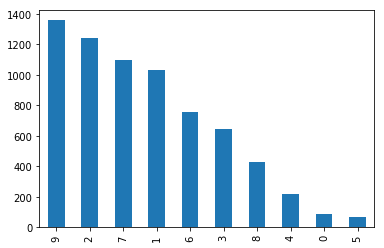

In [27]:
df_sc['group'].value_counts().plot(kind='bar')

In [30]:
df_sc[df_sc['group']==0].describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,divorced,married,single,primary,secondary,tertiary,cellular,telephone,unknown,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,group
count,86.000000,8.600000e+01,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,8.600000e+01,8.600000e+01,86.000000,8.600000e+01,8.600000e+01,8.600000e+01,8.600000e+01,8.600000e+01,8.600000e+01,8.600000e+01,8.600000e+01,8.600000e+01,86.0
mean,0.222000,-1.371485e-01,0.280991,-0.741850,-0.287909,-0.308644,0.136453,-0.265702,0.570455,0.762403,-0.036634,-0.296319,0.347824,-0.090777,-0.310652,0.403638,0.307767,0.199827,-0.437734,-2.568256e-01,-3.913996e-01,-0.063679,-2.678184e-01,-1.674064e-01,-4.347297e-01,-3.516573e-01,-1.002619e-01,-6.621040e-01,-3.202754e-01,-1.349488e-01,8.922795e+00,0.0
std,1.554978,1.675102e-16,1.131197,0.808107,0.634126,1.088993,0.969501,0.452659,1.508262,1.645694,0.960072,1.021619,1.106721,0.906597,0.981213,1.084714,0.843336,1.294195,0.614351,5.583673e-16,2.233469e-16,0.000000,2.233469e-16,1.395918e-16,2.233469e-16,4.466939e-16,5.583673e-17,1.340082e-15,6.700408e-16,1.675102e-16,8.933877e-15,0.0
min,-2.059453,-1.371485e-01,-0.448827,-1.140627,-0.444540,-1.758049,-0.960790,-0.574193,-0.418664,-0.310149,-0.362951,-1.221512,-0.631147,-0.417717,-1.080389,-0.674752,-1.381354,-0.266889,-0.619542,-2.568256e-01,-3.913996e-01,-0.063679,-2.678184e-01,-1.674064e-01,-4.347297e-01,-3.516573e-01,-1.002619e-01,-6.621040e-01,-3.202754e-01,-1.349488e-01,8.922795e+00,0.0
25%,-0.823666,-1.371485e-01,-0.318681,-1.140627,-0.444540,-1.124548,-0.479974,-0.574193,-0.418664,-0.310149,-0.362951,-1.221512,-0.631147,-0.417717,-1.080389,-0.674752,0.723928,-0.266889,-0.619542,-2.568256e-01,-3.913996e-01,-0.063679,-2.678184e-01,-1.674064e-01,-4.347297e-01,-3.516573e-01,-1.002619e-01,-6.621040e-01,-3.202754e-01,-1.349488e-01,8.922795e+00,0.0
50%,-0.253303,-1.371485e-01,-0.121625,-1.140627,-0.444540,-0.551381,-0.088612,-0.574193,-0.042052,0.232436,-0.362951,-1.221512,-0.631147,-0.417717,-1.080389,0.403638,0.723928,-0.266889,-0.619542,-2.568256e-01,-3.913996e-01,-0.063679,-2.678184e-01,-1.674064e-01,-4.347297e-01,-3.516573e-01,-1.002619e-01,-6.621040e-01,-3.202754e-01,-1.349488e-01,8.922795e+00,0.0
75%,0.792363,-1.371485e-01,0.369014,-1.140627,-0.444540,0.775954,0.379158,-0.238367,1.110383,1.317606,-0.362951,0.818657,1.584418,-0.417717,0.925593,1.482027,0.723928,-0.266889,-0.619542,-2.568256e-01,-3.913996e-01,-0.063679,-2.678184e-01,-1.674064e-01,-4.347297e-01,-3.516573e-01,-1.002619e-01,-6.621040e-01,-3.202754e-01,-1.349488e-01,8.922795e+00,0.0
max,4.594785,-1.371485e-01,6.269828,0.876711,2.249514,1.741289,4.257367,2.112416,8.127933,7.286044,2.755191,0.818657,1.584418,2.393965,0.925593,1.482027,0.723928,3.746871,1.614095,-2.568256e-01,-3.913996e-01,-0.063679,-2.678184e-01,-1.674064e-01,-4.347297e-01,-3.516573e-01,-1.002619e-01,-6.621040e-01,-3.202754e-01,-1.349488e-01,8.922795e+00,0.0


In [32]:
#潜在ニーズの抽出

#主成分分析
#データの次元を削減したり、新しい特徴量を作成するため

from sklearn.decomposition import PCA

pca=PCA(0.80)#累積寄与率が0.8になるまで主成分を抽出するインスタンスを生成
df_sc_pca=pca.fit_transform(df_sc)

print(pca.n_components_)
print(df_sc_pca.shape)

17
(6933, 17)


In [33]:
y=pd.read_csv('bank-prep.csv',sep=',')['y']

df_pca=pd.DataFrame(df_sc_pca)
df_pca['y']=y

print(df_pca.shape)

(6933, 18)


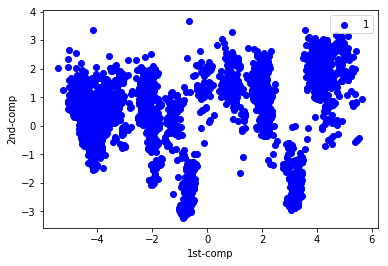

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

df_pca_0=df_pca[df_pca['y']==0]
df_pca_0=df_pca.drop('y',axis=1)
plt.scatter(df_pca_0[0],df_pca_0[1],c='red',label=0)


df_pca_1=df_pca[df_pca['y']==1]
df_pca_1=df_pca.drop('y',axis=1)
plt.scatter(df_pca_1[0],df_pca_1[1],c='blue',label=1)

plt.legend()
plt.xlabel('1st-comp')
plt.ylabel('2nd-comp')
plt.show()